# Image Basics

This notebook presents the basics about images within Menpo. It includes the following sections:
    
 1. Introduction
 2. Image
 3. Boolean Image
 4. Masked Image
 5. Widgets

## 1. Introduction

**Images** are simply **n-dimensional** regular arrays of **pixels** where **n >= 2**. Each pixel has **k-channels** of information. All pixels and all channels are of the same data type, but there is no restriction in general on what that data type is.

There are two main subclasses of `Image` - `BooleanImage` and `MaskedImage`. The vast majority of the functionality is provided by `Image` and hence available on all three Image types - the subclasses are simple specializations which will be explained in this notebook.

**Note that for efficieny reasons, we store images by having the channels in the first axis!**

Thus, we use the syntax 
    
    ([k], i, j, ...., l)
    
to declare an image shape. The `i` is the size of the first image dimension, `j` the second. This image is of `n` dimensions - the final spatial dimension being of size `l`. The `[]` sybolizes that this is the channel axis - this image has `k` channels. A few examples for clarity:

- low-resolution greyscale image: `([1], 320, 240)`
- high-resolution RGB image: `([3], 1700, 1650)`
- intensity voxel image: `([1], 1024, 1024, 1024)`

commonly the channel has an explicit meaning - these are symbolized by a `<>`. For example:
    
- low-resolution greyscale image: `(<I>, 320, 240)`
- high-resolution RGB image: `(<R, G, B>, 1700, 1650)`
- depth image: `(<Z>, 1024, 768)`

We now use this notation to explain all of the image classes. As a final note - some classes are fixed to have only one channel. The constructors for these images don't expect you to pass a numpy array in with a dead axis on the end all the time. To signify this, the channel signature includes an exclamation mark to show it is implictly generated for you, for example

- depth image: `(!<Z>!, 1024, 768)` 

To aid with the explanations, lets import the good old Takeo and Lena images. `import_builtin_asset(asset_name)` or `import_builtin_asset.asset_name()` allows us to quickly grab a few builtin images

In [1]:
%matplotlib inline
import numpy as np
import menpo.io as mio

lenna = mio.import_builtin_asset('lenna.png')
takeo_rgb = mio.import_builtin_asset.takeo_ppm() # equivalent to: mio.import_builtin_asset('takeo.ppm')
# Takeo is RGB with repeated channels - convert to greyscale
takeo = takeo_rgb.as_greyscale(mode='average')

In [2]:
print('Lenna is a {}'.format(type(lenna)))
print('Takeo is a {}'.format(type(takeo)))

Lenna is a <class 'menpo.image.base.Image'>
Takeo is a <class 'menpo.image.base.Image'>


## 2. Image

`([k], i, j, ...., n)`

All images are `Image` instance, and a large bulk of functionality can be explored in this one class.

In [3]:
from menpo.image import Image
print("Lenna 'isa' Image: {}".format(isinstance(lenna, Image)))
print("Takeo 'isa' Image: {}".format(isinstance(takeo, Image)))

Lenna 'isa' Image: True
Takeo 'isa' Image: True


**pixels**
- The actual data of the image is stored on the `self.pixels` property. `self.pixels[0]` is refered to as the *channel axis* - it is always present on an instantiated subclass of `Image` (even if for instance we know the number of channels to always be 1)

In [4]:
print('Takeo shape: {}'.format(takeo.pixels.shape))
print('The number of channels in Takeo is {}'.format(takeo.pixels.shape[0]))
print("But the right way to find out is with the 'n_channels' property: {}".format(takeo.n_channels))
print('n_channels for Lenna is {}'.format(lenna.n_channels))

Takeo shape: (1, 225, 150)
The number of channels in Takeo is 1
But the right way to find out is with the 'n_channels' property: 1
n_channels for Lenna is 3


**shape**
- The `self.shape` of the image is the spatial dimension of the array- that's `(i, j, ..., n)`

In [5]:
print('Takeo has a shape of {}'.format(takeo.shape))
print('Lenna has a shape of {}'.format(lenna.shape))

Takeo has a shape of (225, 150)
Lenna has a shape of (512, 512)


**width and height**
- Annoyingly, images have a very a peculiar format. The `0`'th axis of pixels is the 'height' or 'y' axis, and it starts at the top of the image and runs down. The `1`'st axis is the 'width' or 'x' axis - it starts from the left of the image and runs across.

Most of the time worrying about this will lead you into hot water - it's a lot better to not get bogged down in the terminology and just consider the image as an array, just like all our other data. As a result, all our algorithms, such as gradient, will be ordered by axis `0,1,...,n` not `x,y, z` (as this would be axis `1,0,2`). The `self.shape` we printed above was the shape of the underlying array, and so was semantically `(height, width)`. You can use the `self.width` and `self.height` properties to check this for yourself if you ever get confused though

In [6]:
print('Takeo\'s arrangement in memory (for maths) is {}'.format(takeo.shape))
print('Semantically, Takeo has W:{} H:{}'.format(takeo.width, takeo.height))
print(takeo)  # shows the common semantic labels

Takeo's arrangement in memory (for maths) is (225, 150)
Semantically, Takeo has W:150 H:225
150W x 225H 2D Image with 1 channel


**centre**
- Returns the gemetric centre of the image, in axis ordering

In [7]:
# note that this is (axis0, axis1), which is (height, width) or (Y, X)!
print('The centre of Takeo is {}'.format(takeo.centre()))

The centre of Takeo is [ 112.5   75. ]


**counts**
- Image metrics are directly accessable as properties. Note that `n_pixels` is channel independent - to find the total size of the array (including channels) use `n_elements`.

In [8]:
print('Lenna n_dims : {}'.format(lenna.n_dims))
print('Lenna n_channels : {}'.format(lenna.n_channels))
print('Lenna n_pixels : {}'.format(lenna.n_pixels))
print('Lenna n_elements: {}'.format(lenna.n_elements))

Lenna n_dims : 2
Lenna n_channels : 3
Lenna n_pixels : 262144
Lenna n_elements: 786432


**view**
- As you'd expect, all images are viewable.

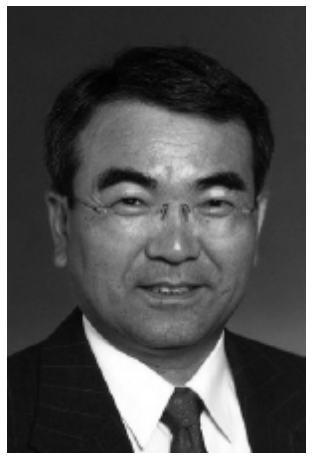

In [9]:
takeo.view();

- And the `view()` function has several options, such as `render_axes`, `axes_font_weight`, `alpha`, `figure_size` and others.

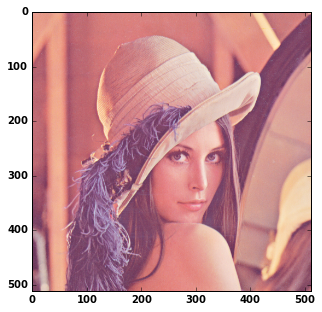

In [10]:
# render lenna with axes and transparency!
lenna.view(render_axes=True, axes_font_weight='bold', alpha=0.8, figure_size=(7, 5));

- You can pass the `channels=x` to inspect a single channel of the image...

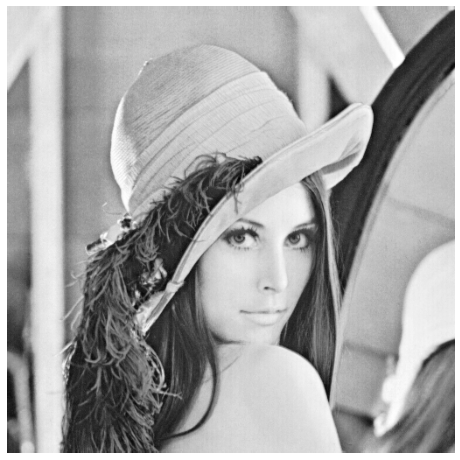

In [11]:
# viewing Lenna's red channel...
lenna.view(channels=0);

...or more than one channels, e.g. `channels=[1, 2]`

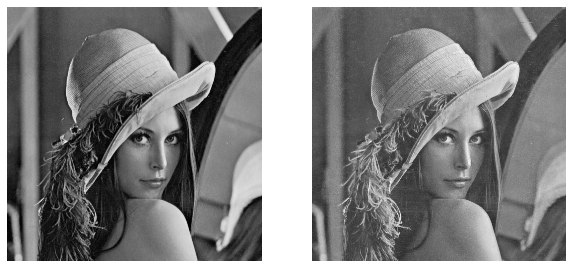

In [12]:
# viewing Lenna's green and blue channels...
lenna.view(channels=[1, 2]);

**crop**
- All images are cropable. There are two core crop methods: `crop_inplace()`, which is inplace, and `crop()` which returns the cropped image without damaging the instance it is called on. Both execute identical code paths. To crop we provide the minimum values per dimension where we want the crop to start, and the maximum values where we want the crop to end. For example, to crop Takeo from the centre down to the bottom corner, we could do

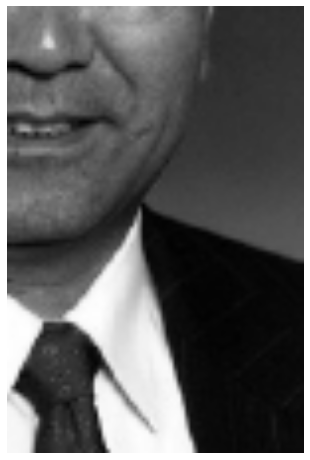

In [13]:
takeo_cropped = takeo.crop(takeo.centre(), np.array(takeo.shape))
takeo_cropped.view();

**rescale**
- All images are rescalable. Simply choose the scale factor you wish to apply. For instance, to make Lena twice as big

In [14]:
lenna_double = lenna.rescale(2.0)
print(lenna_double)

1024W x 1024H 2D Image with 3 channels


**landmark support**
- All Images are landmarkable. Let's import an image that has landmarks attached

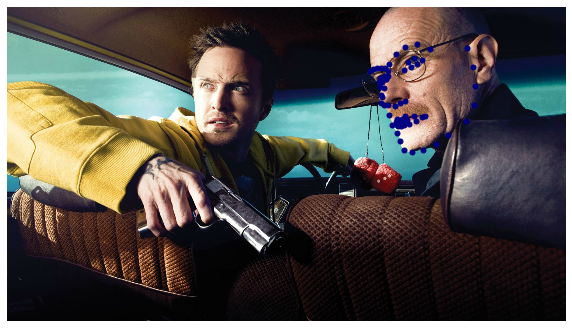

In [15]:
breakingbad = mio.import_builtin_asset('breakingbad.jpg')
breakingbad.view_landmarks(group='PTS');

In [16]:
print(breakingbad.landmarks)

LandmarkManager: n_groups: 1
(PTS): LandmarkGroup: n_labels: 1, n_points: 68


- It can sometimes be useful to constrain an image to be bound around it's landmarks. Two convienience methods exist to do just this. The one expects a `boundary` argument...

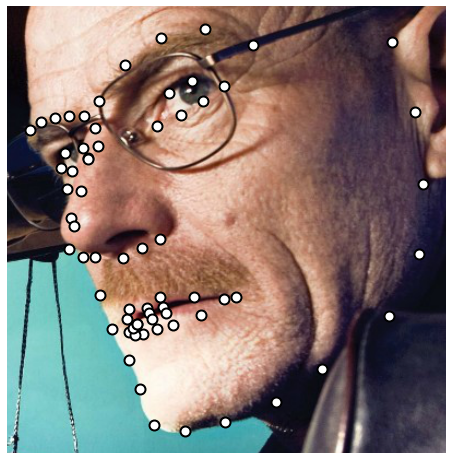

In [17]:
bb = breakingbad.crop_to_landmarks(boundary=20)
# note that this method is smart enough to not stray outside the boundary of the image
bb.view_landmarks(group='PTS', marker_size=10, marker_edge_colour='k', marker_face_colour='w', marker_edge_width=2);

...and the other a `proportion` value

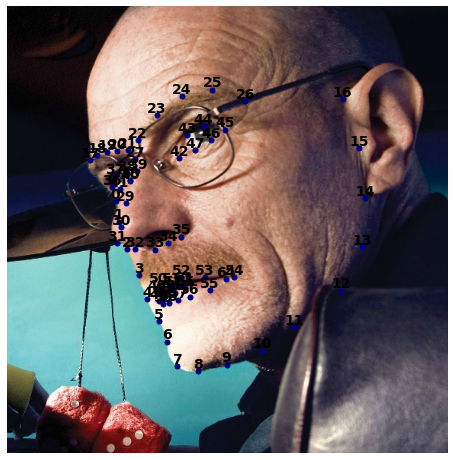

In [18]:
bb = breakingbad.crop_to_landmarks_proportion(0.3)
# note that this method is smart enough to not stray outside the boundary of the image
bb.view_landmarks(group='PTS', render_numbering=True, numbers_font_size=14, numbers_font_weight='bold');

Note that the `view_landmarks()` has lots of rendering options regarding axes, numbers, lines, marker and legend.

## 3. BooleanImage

`(!<B>!, i, j, ...., n)`

The first concrete Image subclass we will look at is `BooleanImage`. This is an **n-dimensional** image with a single channel per pixel. The datatype of this image is `np.bool`. First, remember that `BooleanImage` is a subclass of `Image` and so all of the above features apply again.

the mask's shape is as expected: (512, 512)
the channel has been added to the mask's pixel's shape for us: (1, 512, 512)


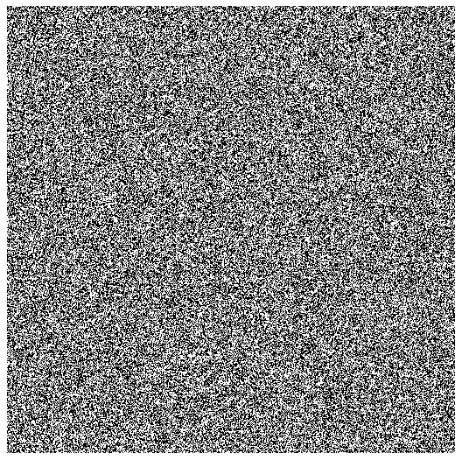

In [19]:
from menpo.image import BooleanImage
random_seed = np.random.random(lenna.shape) # shape doesn't include channel - and that's what we want
random_mask = BooleanImage(random_seed > 0.5)
print("the mask's shape is as expected: {}".format(random_mask.shape))
print("the channel has been added to the mask's pixel's shape for us: {}".format(random_mask.pixels.shape))
random_mask.view();

Note that the constructor for the Boolean Image doesn't require you to pass in the redundant channel axis - it's created for you.

**blank()**
- If you just want a quick all true or all false mask use the `blank()` method. You can rely on this existing on every concrete Image class.

In [20]:
all_true_mask = BooleanImage.init_blank((120, 240))
all_false_mask = BooleanImage.init_blank((120, 240), fill=False)

**metrics**
- It's trivial to find out how many True and False elements there are in the mask

In [21]:
print('n_pixels on random_mask: {}'.format(random_mask.n_pixels))
print('n_true pixels on random_mask: {}'.format(random_mask.n_true()))
print('n_false pixels on random_mask: {}'.format(random_mask.n_false()))
print('proportion_true on random_mask: {:.3}'.format(random_mask.proportion_true()))
print('proportion_false on random_mask: {:.3}'.format(random_mask.proportion_false()))

n_pixels on random_mask: 262144
n_true pixels on random_mask: 131399
n_false pixels on random_mask: 130745
proportion_true on random_mask: 0.501
proportion_false on random_mask: 0.499


**true_indices/false_indices** 
- In addition, `BooleanImage` has functionality that aids in the use of the class as a mask to another image. The indices properties give you access to the coordinates of the True and False values as if the mask had been flattened.

In [22]:
from copy import deepcopy
small_amount_true = deepcopy(all_false_mask)
small_amount_true.pixels[0, 4, 8] = True
small_amount_true.pixels[0, 15, 56] = True
small_amount_true.pixels[0, 0, 4] = True
print(small_amount_true.true_indices())  # note the ordering is incremental C ordered
print('The shape of true indices: {}'.format(small_amount_true.true_indices().shape))
print('The shape of false indices: {}'.format(small_amount_true.false_indices().shape))

[[ 0  4]
 [ 4  8]
 [15 56]]
The shape of true indices: (3, 2)
The shape of false indices: (28797, 2)


**indices**
- For completion, you can request the indices of the whole mask

In [23]:
print('The shape of indices: {}'.format(small_amount_true.indices().shape))
# note that indices = true_indices + false_indices

The shape of indices: (28800, 2)


**mask**
- if you need to directly mask another image of the same size (with an arbitriy number of channels) use the `mask` property. This is used heavily in `MaskedImage`.

In [24]:
lenna_masked_pixels_flatted = lenna.pixels[0, random_mask.mask]
lenna_masked_pixels_flatted.shape
# note we can only do this as random_mask is the shape of lenna
print('Is Lenna and random mask the same shape? {}'.format(lenna.shape == random_mask.shape))

Is Lenna and random mask the same shape? True


**print**
- often, you just want an overview of an image. Just print it to get a quick summary

In [25]:
print(random_mask)
print(lenna)
print(takeo)

512W x 512H 2D mask, 50.1% of which is True
512W x 512H 2D Image with 3 channels
150W x 225H 2D Image with 1 channel


## 4. MaskedImage

`([k], i, j, ...., n)`

The last `Image` subclass is `MaskedImage`. Note that **all images imported through menpo.io are instances of Image** and you should manually convert them to `MaskedImage` instances if you wish. Just like you would expect, `MaskedImage`s have a mask attached to them which augments their usual behavior.

**mask**
- All `MaskedImage`s have a `BooleanImage` of appropriate size attached to them at the mask property. On construction, a mask can be specified at the `mask` kwarg (either a boolean `ndarray` or a `BooleanImage` instance). If nothing is provided, the mask is set to all true. A `MaskedImage` with an all true mask behaves exactly as an Image - abeit with a performance penalty. An `Image` instance can be converted to `MaskedImage` using the `as_masked()` method.

150W x 225H 2D mask, 100.0% of which is True
1920W x 1080H 2D mask, 100.0% of which is True


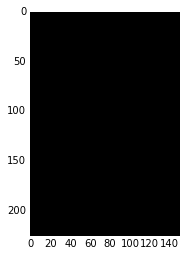

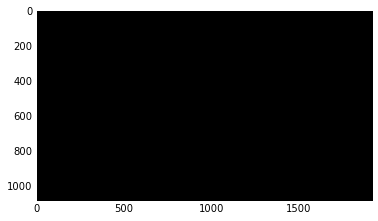

In [26]:
takeo_masked = takeo.as_masked()
print(takeo_masked.mask)
takeo_masked.mask.view(figure_size=(6, 4), render_axes=True);

breakingbad_masked = breakingbad.as_masked()
print(breakingbad_masked.mask)
breakingbad_masked.mask.view(new_figure=True, figure_size=(6, 4), render_axes=True);

**constrain_mask_to_landmarks**
- It allows us to update the mask to equal the convex hull around some landmarks on the image. You can choose a particular group of landmarks (e.g. PTS) and then a specific label (e.g. perimeter). By default, if neither are provided (and if their is only one landmark group) all the landmarks are used to form a convex hull.

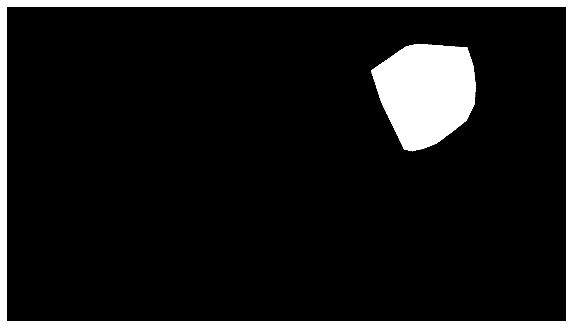

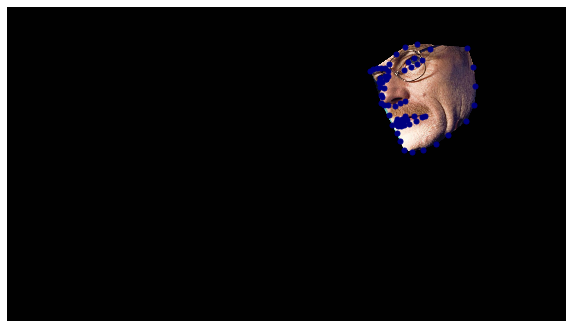

In [27]:
bb_masked_constrained = breakingbad_masked.constrain_mask_to_landmarks()
bb_masked_constrained.mask.view();
bb_masked_constrained.view_landmarks(new_figure=True);

**view behavior**
- By default, only the masked part of a masked image is shown when viewing

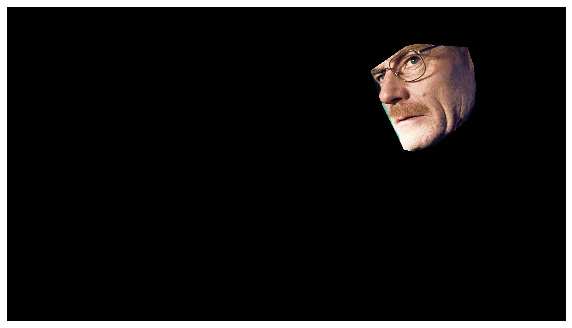

In [28]:
bb_masked_constrained.view();

- Use `masked=False` to see everything.

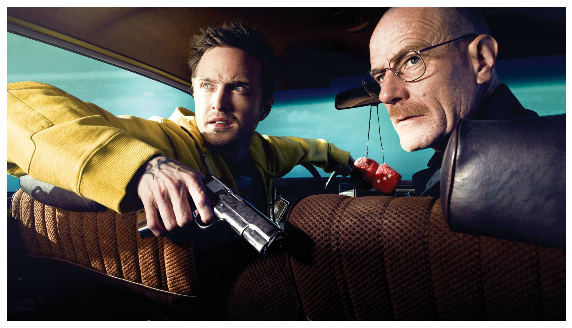

In [29]:
bb_masked_constrained.view(masked=False);

**as_vector() / from_vector() behavior**
- The `as_vector()` and `from_vector()` methods on `MaskedImage`s only returns `True` mask values flattened.

In [30]:
print('bb_masked_constrained has {} pixels, but only {} are '
      'masked.'.format(bb_masked_constrained.n_pixels, bb_masked_constrained.n_true_pixels()))
print('bb_masked_constrained has {} elements (3 x n_pixels)'.format(bb_masked_constrained.n_elements))
vectorized_bad = bb_masked_constrained.as_vector()
print('vector of bb_masked_constrained is of shape {}'.format(vectorized_bad.shape))

bb_masked_constrained has 2073600 pixels, but only 97498 are masked.
bb_masked_constrained has 6220800 elements (3 x n_pixels)
vector of bb_masked_constrained is of shape (292494,)


**constrain_mask_to_landmarks**
Allows us to update the mask to equal the convex hull around some landmarks on the image. You can choose a particular group of landmarks (e.g. `PTS`) and then a specific label (e.g. `perimeter`). By default, if neither are provided (and if their is only one landmark group) all the landmarks are used to form a convex hull.

## 5. Widgets

Finally, it is worth noticing than most of the previous image information and visualization options (and others, like image saving) can be conveniently accessed from a specifically designed `Image` **IPython Notebook Widget** by simply calling the method `view_widget` on any `Menpo` - `Image` object. Note that the widget functionality is provided by the menpowidgets project and should be installed separately using conda (`conda install -c menpo menpowidgets`).

The widget has several options related to channels, landmarks and the renderer itself.

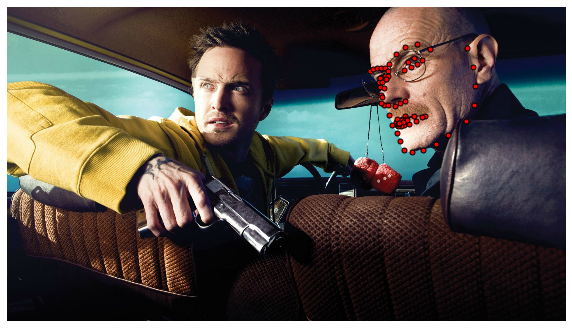

In [31]:
breakingbad.view_widget()

Similarly, a `list` of images can be viewed using the `visualize_images()` widget. The widget allows to animate through the images.

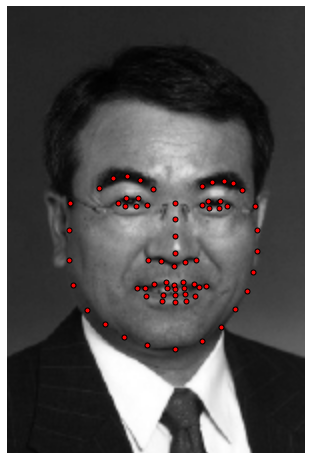

In [32]:
from menpowidgets import visualize_images

visualize_images([takeo, breakingbad_masked, lenna])